# Fleurs iris

$\textbf{Description de la base de données :}$

Elle contient la longueur du sépale (Sepal.Length), la largeur du sépale (Sepal.Width), la longueur du pétale (Petal.Length) et la largeur du pétale (Petal.Width) pour trois espèces d’iris : Iris setosa, Iris versicolor et Iris virginica.

R.A. Fisher a utilisé ces données pour construire des combinaisons linéaires des variables permettant de mieux séparer au mieux les différentes espèces d’iris

# Importation des librairies

In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
##
from scipy.stats import f_oneway
from scipy import stats
from scipy.stats import skew, kurtosis

%matplotlib notebook

# Importation des données

In [157]:
data_iris=pd.read_csv('iris.csv')
data_iris.head(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [158]:
data=data_iris.copy()

# Renommer les variables

In [159]:
data=data.rename(columns={'SepalLength':'Longueur_Sepale',
                     'SepalWidth':'Largeur_Sepale',
                     'PetalLength':'Longueur_Petale',
                     'PetalWidth':'Largeur_Petale',
                     'Name':'Nom'})

data.head(10)

,Longueur_Sepale,Largeur_Sepale,Longueur_Petale,Largeur_Petale,Nom
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# Identifier les données manquantes et les traiter

In [160]:
###Données manquantes
data.isna().sum()

Longueur_Sepale    0
Largeur_Sepale     0
Longueur_Petale    0
Largeur_Petale     0
Nom                0
dtype: int64

# Détecter les doublons 

In [161]:
##Nombre de doublons
len(data)-len(data.drop_duplicates())

3

In [162]:
data[data.duplicated()]

,Longueur_Sepale,Largeur_Sepale,Longueur_Petale,Largeur_Petale,Nom
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [163]:
data=data.drop_duplicates(keep='first')
data.shape

(147, 5)

In [164]:
len(data)-len(data.drop_duplicates())

0

# Données aberrantes (outlier)

### Détacher les variables explicatives de la réponse

In [165]:
nvar=data.shape[1]
var=data.columns
var_X=var[:nvar-1,]
var_y=var[nvar-1]

###
print('Les variables explicatives sont : ','\n', var_X)
print('La réponse est : ','\n', var_y)

Les variables explicatives sont :  
 Index(['Longueur_Sepale', 'Largeur_Sepale', 'Longueur_Petale',
       'Largeur_Petale'],
      dtype='object')
La réponse est :  
 Nom


In [166]:
##Les modalités de la variable réponse
print('Les modalités de la variable réponse sont :','\n',y.unique())
print('Le nombre de classe :','\n',len(y.unique()))

Les modalités de la variable réponse sont : 
 ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Le nombre de classe : 
 3


In [218]:
###Variables explicatives et la réponse
X=data[var_X]
y=data[var_y]
X.head(10)

,Longueur_Sepale,Largeur_Sepale,Longueur_Petale,Largeur_Petale
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


### Boxplots des variables explicatives

<IPython.core.display.Javascript object>


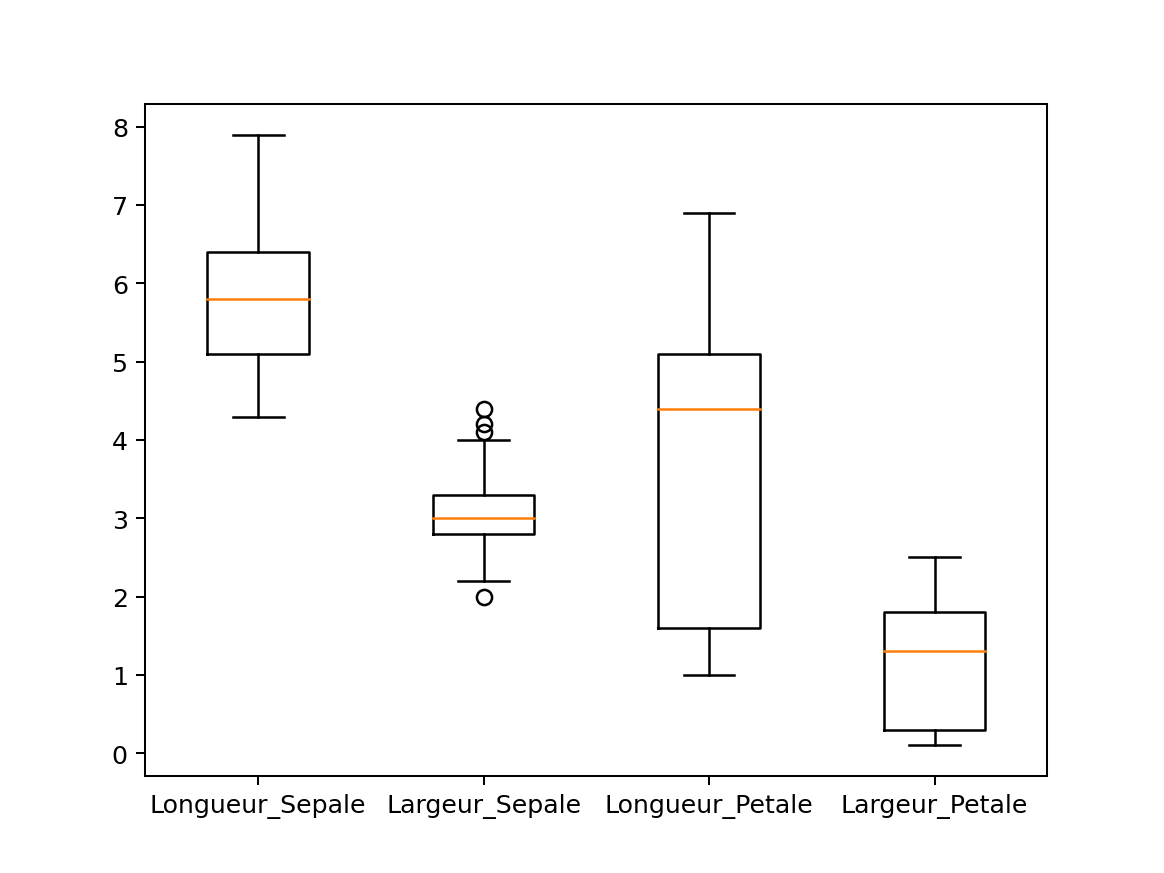

In [168]:
plt.figure()
plt.boxplot(X,data=data, labels=var_X)
plt.show()

In [169]:
T=sorted(data['Largeur_Sepale'])
print('les données aberrantes repérées graphiquement ', '\n', T[0],T[-3:])

les données aberrantes repérées graphiquement  
 2.0 [4.1, 4.2, 4.4]


# Les sous-bases de données des types de fleurs

In [170]:
setosa=data[data[var_y]=='Iris-setosa']
virginica=data[data[var_y]=='Iris-virginica']
versicolor=data[data[var_y]=='Iris-versicolor']

In [171]:
###Afficher les tailles des sous-bases
print('le nombre de fleur setosa dans la base de données :', '\n',setosa.shape[0])
print('le nombre de fleur virginica dans la base de données :', '\n',virginica.shape[0])
print('le nombre de fleur versicolor dans la base de données :', '\n',versicolor.shape[0])

le nombre de fleur setosa dans la base de données : 
 48
le nombre de fleur virginica dans la base de données : 
 49
le nombre de fleur versicolor dans la base de données : 
 50


$\textbf{Interprétation :}$ une base de données complètement équilibrées. Une situation très rare

In [172]:
help(sns.pairplot)

Help on function pairplot in module seaborn.axisgrid:

pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
    Plot pairwise relationships in a dataset.
    
    By default, this function will create a grid of Axes such that each numeric
    variable in ``data`` will by shared across the y-axes across a single row and
    the x-axes across a single column. The diagonal plots are treated
    differently: a univariate distribution plot is drawn to show the marginal
    distribution of the data in each column.
    
    It is also possible to show a subset of variables or plot different
    variables on the rows and columns.
    
    This is a high-level interface for :class:`PairGrid` that is intended to
    make it easy to draw a few common styles. You should use :class:`PairGrid`
    directly 

<IPython.core.display.Javascript object>


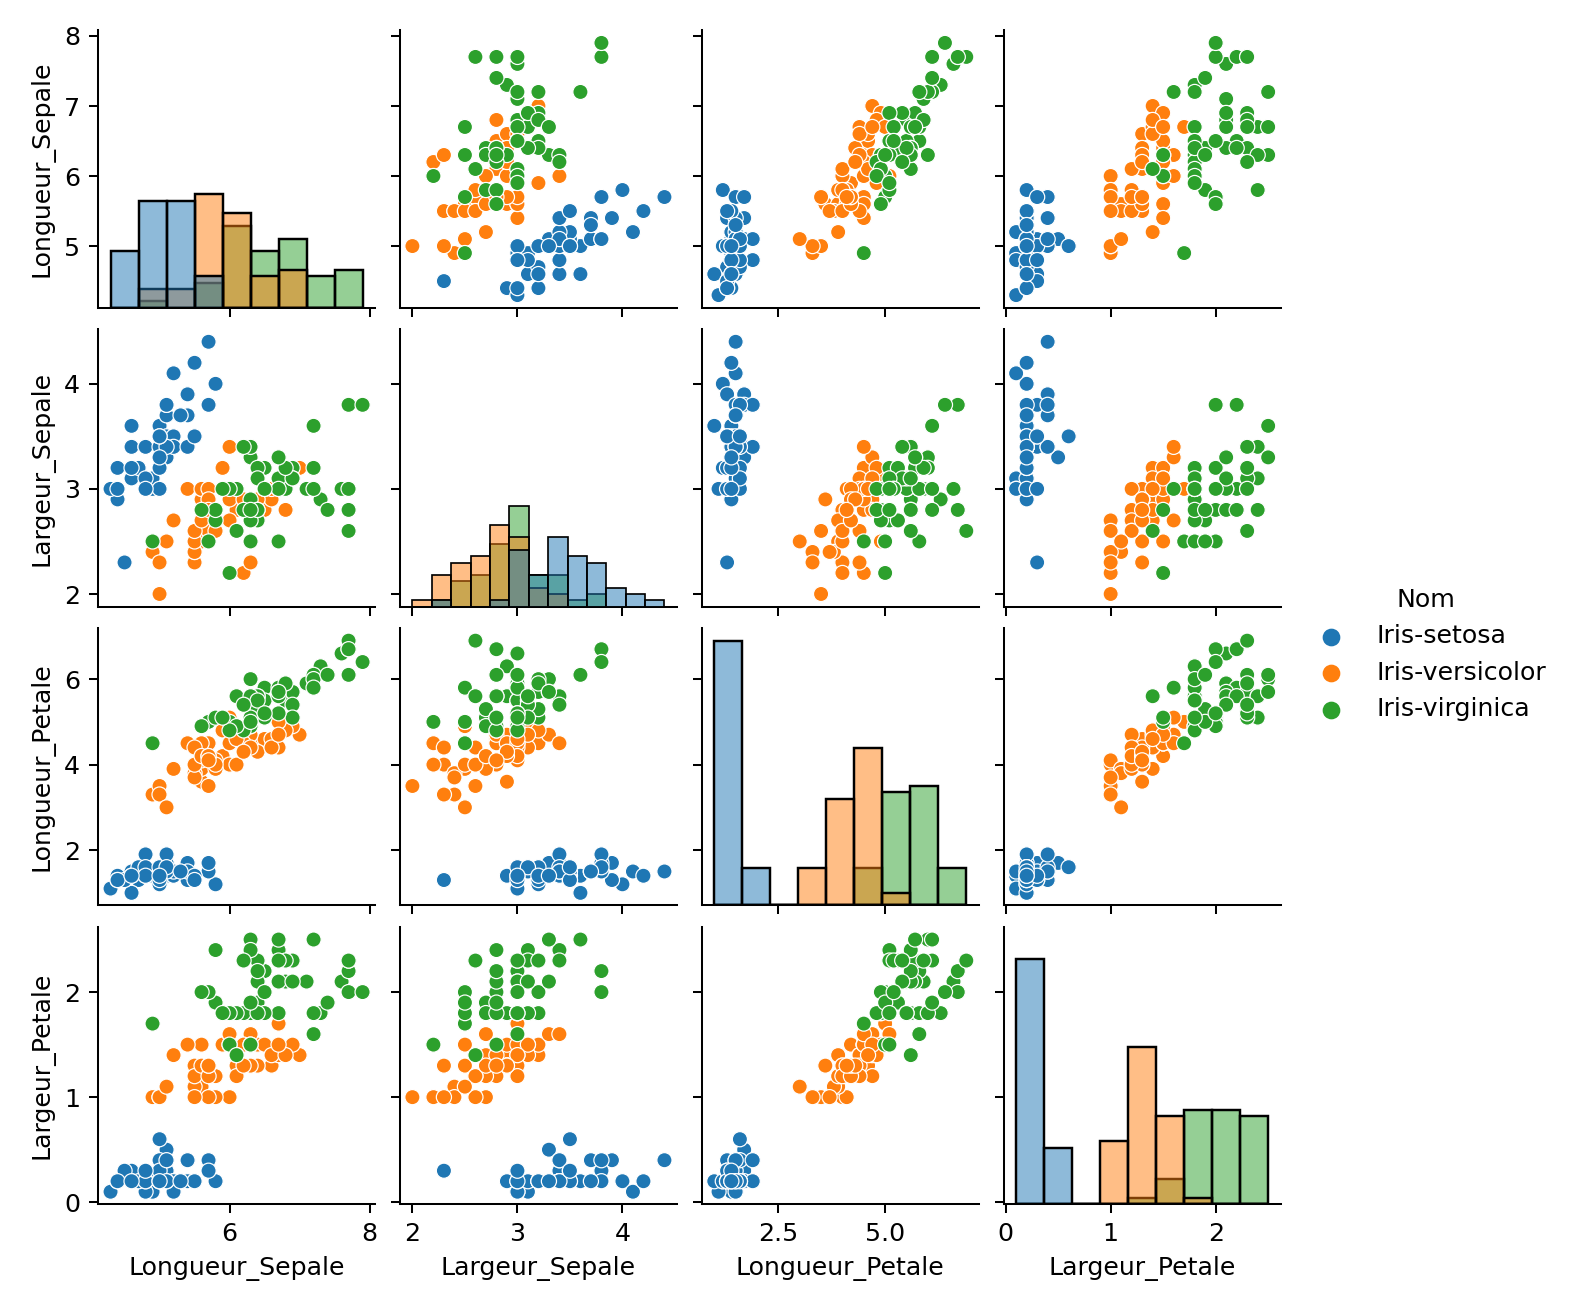

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [173]:
sns.pairplot(data, hue=var_y,kind='scatter',diag_kind='hist',height=1.8)
plt.show()

<IPython.core.display.Javascript object>


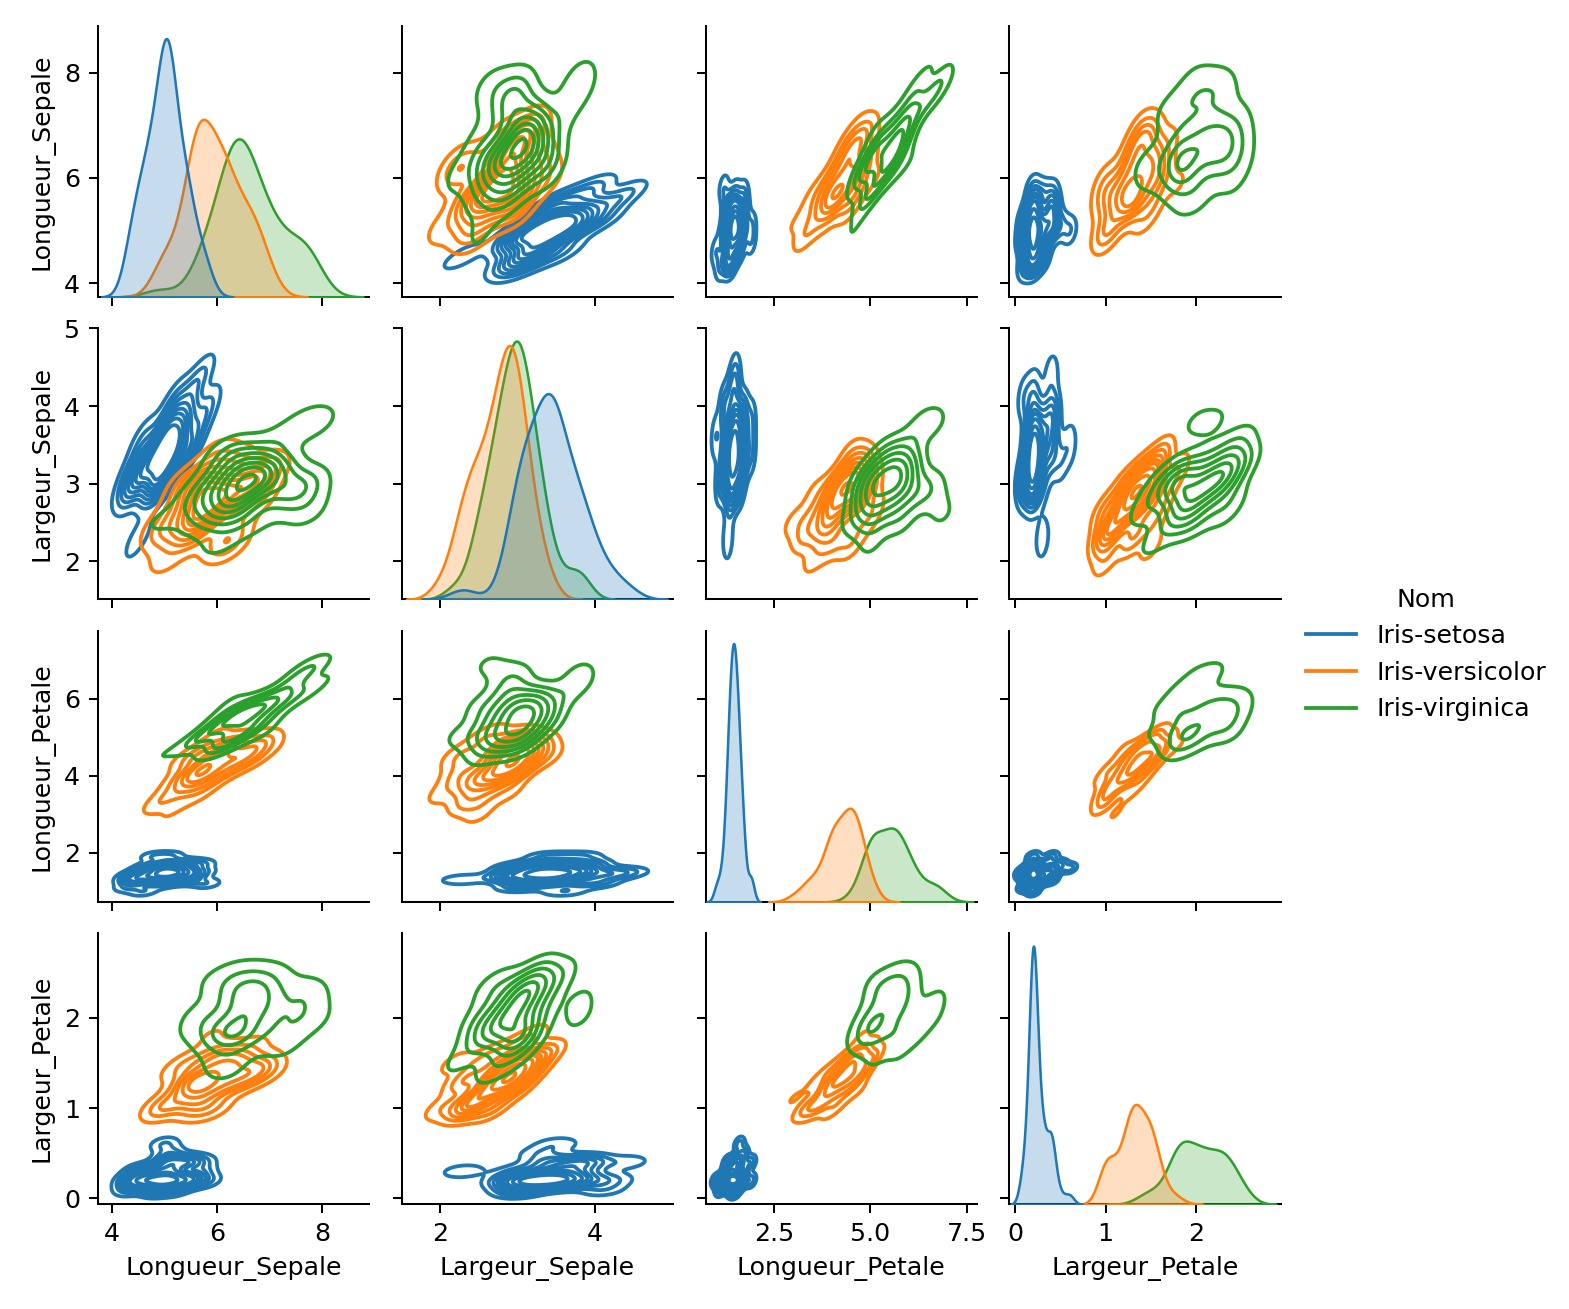

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [174]:
sns.pairplot(data, hue=var_y,kind='kde',diag_kind='kde',height=1.8)

### Nuages de points en 3D

<IPython.core.display.Javascript object>


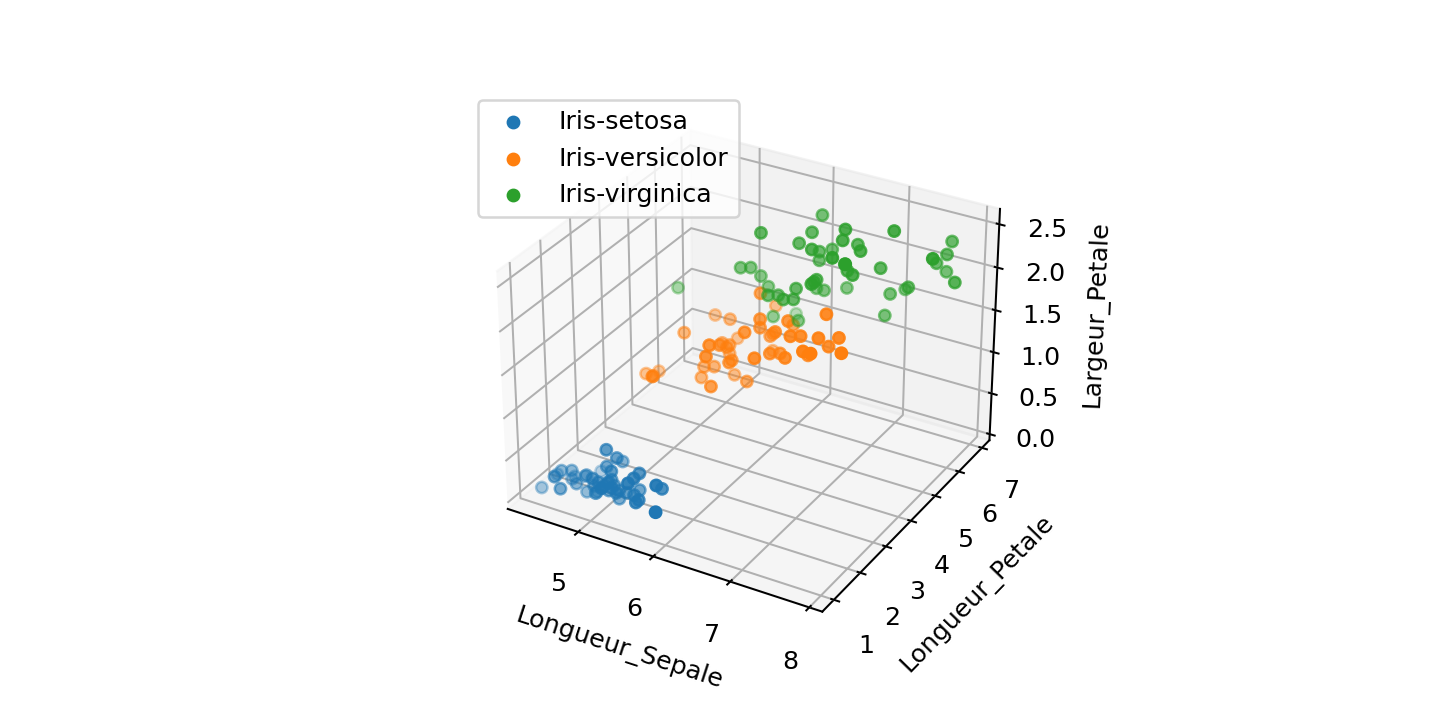

In [175]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(projection='3d')

for spec, clas in data.groupby(var_y):
    ax.scatter(clas[var_X[0]], clas[var_X[2]], clas[var_X[3]], label=spec)
    ax.set_xlabel('Longueur_Sepale')
    ax.set_ylabel('Longueur_Petale')
    ax.set_zlabel('Largeur_Petale')
    ax.legend(loc='upper left')

plt.show()

# Indépendances des variables des  classes 

### Matrice de corrélation 

<IPython.core.display.Javascript object>


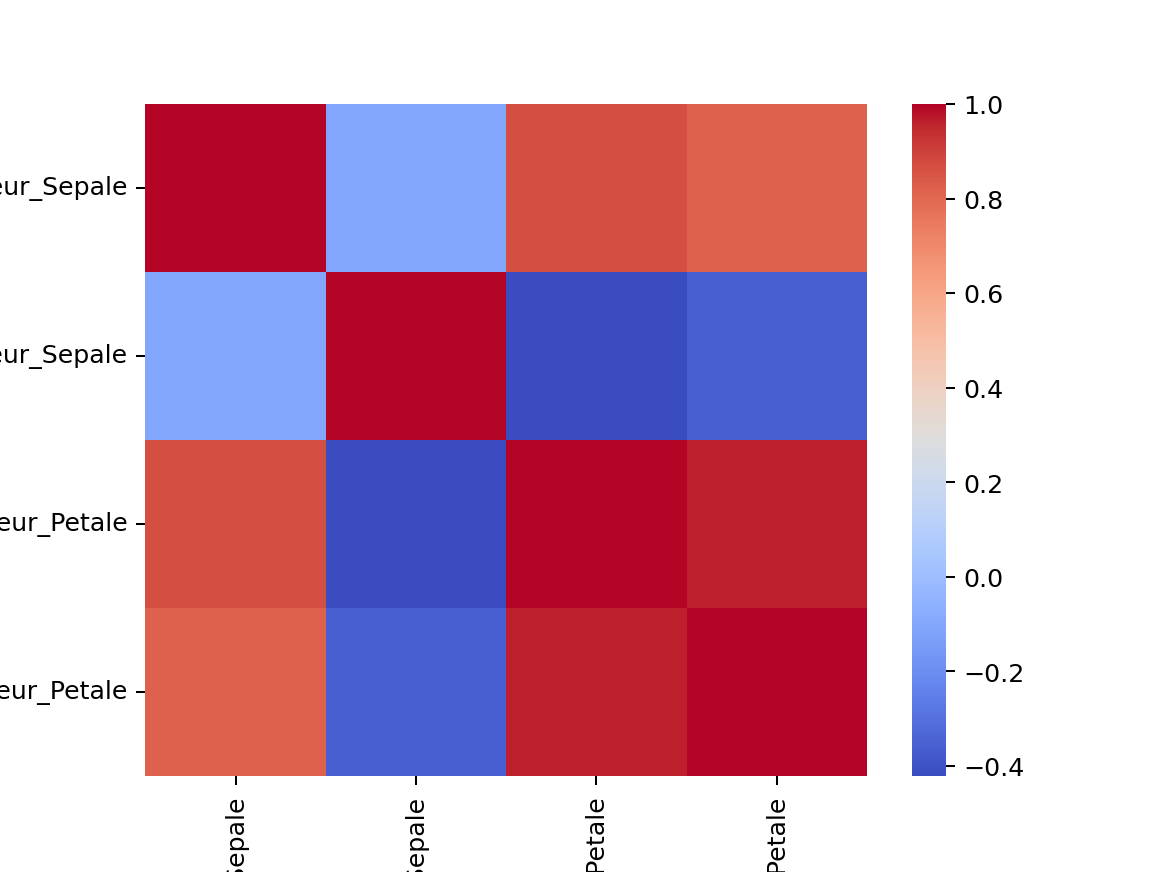

,Longueur_Sepale,Largeur_Sepale,Longueur_Petale,Largeur_Petale
Longueur_Sepale,1.000000,-0.109321,0.871305,0.817058
Largeur_Sepale,-0.109321,1.000000,-0.421057,-0.356376
Longueur_Petale,0.871305,-0.421057,1.000000,0.961883
Largeur_Petale,0.817058,-0.356376,0.961883,1.000000


In [176]:
###
Mat_corr=data[var_X].corr()

plt.figure()
sns.heatmap(Mat_corr, cmap = 'coolwarm')
plt.show()
Mat_corr

### Test de Pearson, corrélation de Spearman, tau de Kendall

In [177]:
from scipy.stats import pearsonr
from scipy.stats import kendalltau

In [178]:
help(pearsonr)

Help on function pearsonr in module scipy.stats._stats_py:

pearsonr(x, y, *, alternative='two-sided', method=None)
    Pearson correlation coefficient and p-value for testing non-correlation.
    
    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets. Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.
    
    This function also performs a test of the null hypothesis that the
    distributions underlying the samples are uncorrelated and normally
    distributed. (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)
    The p-value roughly indicates the probability of an uncorrelated system
    producing 

In [179]:
help(stats.spearmanr)

Help on function spearmanr in module scipy.stats._stats_py:

spearmanr(a, b=None, axis=0, nan_policy='propagate', alternative='two-sided')
    Calculate a Spearman correlation coefficient with associated p-value.
    
    The Spearman rank-order correlation coefficient is a nonparametric measure
    of the monotonicity of the relationship between two datasets.
    Like other correlation coefficients,
    this one varies between -1 and +1 with 0 implying no correlation.
    Correlations of -1 or +1 imply an exact monotonic relationship. Positive
    correlations imply that as x increases, so does y. Negative correlations
    imply that as x increases, y decreases.
    
    The p-value roughly indicates the probability of an uncorrelated system
    producing datasets that have a Spearman correlation at least as extreme
    as the one computed from these datasets. Although calculation of the
    p-value does not make strong assumptions about the distributions underlying
    the samples, i

In [180]:
help(kendalltau)

Help on function kendalltau in module scipy.stats._stats_py:

kendalltau(x, y, initial_lexsort=None, nan_policy='propagate', method='auto', variant='b', alternative='two-sided')
    Calculate Kendall's tau, a correlation measure for ordinal data.
    
    Kendall's tau is a measure of the correspondence between two rankings.
    Values close to 1 indicate strong agreement, and values close to -1
    indicate strong disagreement. This implements two variants of Kendall's
    tau: tau-b (the default) and tau-c (also known as Stuart's tau-c). These
    differ only in how they are normalized to lie within the range -1 to 1;
    the hypothesis tests (their p-values) are identical. Kendall's original
    tau-a is not implemented separately because both tau-b and tau-c reduce
    to tau-a in the absence of ties.
    
    Parameters
    ----------
    x, y : array_like
        Arrays of rankings, of the same shape. If arrays are not 1-D, they
        will be flattened to 1-D.
    initial_lexso

In [181]:
###Longueur de sépale et largeur de sépale
###
Sep_corr=pd.DataFrame({
    'Test_Pearson':pearsonr(data["Longueur_Sepale"],data["Largeur_Sepale"]),
    'Test de Spearman' : stats.spearmanr(data["Longueur_Sepale"],data["Largeur_Sepale"]),
    'Test de Kendall' : kendalltau(data["Longueur_Sepale"],data["Largeur_Sepale"])
})

Sep_corr.set_index([["correlation","p_value"]])

,Test_Pearson,Test de Spearman,Test de Kendall
correlation,-0.109321,-0.155711,-0.070185
p_value,0.187476,0.059661,0.229711


In [182]:
###Longueur de pétale et largeur de pétale
###
Pet_corr=pd.DataFrame({
    'Test_Pearson':pearsonr(data["Longueur_Petale"],data["Largeur_Petale"]),
    'Test de Spearman' : stats.spearmanr(data["Longueur_Petale"],data["Largeur_Petale"]),
    'Test de Kendall' : kendalltau(data["Longueur_Petale"],data["Largeur_Petale"])
})

Pet_corr.set_index([["correlation","p_value"]])

,Test_Pearson,Test de Spearman,Test de Kendall
correlation,9.618828e-01,9.379839e-01,8.067200e-01
p_value,1.539056e-83,1.372082e-68,1.628461e-43


### Multicolinéarité entre les variables 

la multicolinéarité est un problème qui survient lorsque certaines variables mesurent le même phénomène. Une multicolinéarité prononcée s’avère problématique, car elle peut augmenter la variance des coefficients de régression et les rendre instables et difficiles à interpréter. 

Précisement, on parle de multicolinéarité lorsque l'une des variables explicatives est une combinaison  linéaire d'une ou plusieurs autres variables explicatives.

La mesure de la multicolinéarité se fait avec les facteurs d’inflation de la variance (variance inflation factor VIF)

In [183]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [184]:
help(variance_inflation_factor)

Help on function variance_inflation_factor in module statsmodels.stats.outliers_influence:

variance_inflation_factor(exog, exog_idx)
    Variance inflation factor, VIF, for one exogenous variable
    
    The variance inflation factor is a measure for the increase of the
    variance of the parameter estimates if an additional variable, given by
    exog_idx is added to the linear regression. It is a measure for
    multicollinearity of the design matrix, exog.
    
    One recommendation is that if VIF is greater than 5, then the explanatory
    variable given by exog_idx is highly collinear with the other explanatory
    variables, and the parameter estimates will have large standard errors
    because of this.
    
    Parameters
    ----------
    exog : {ndarray, DataFrame}
        design matrix with all explanatory variables, as for example used in
        regression
    exog_idx : int
        index of the exogenous variable in the columns of exog
    
    Returns
    -------
  

In [185]:
tab_vif=[]
for i in range(len(var_X)):
    tab_vif.append(variance_inflation_factor(data[var_X],i))

tab_res=pd.DataFrame({
    'variable':var_X,
    'vif' : tab_vif
})
tab_res

,variable,vif
0,Longueur_Sepale,261.745411
1,Largeur_Sepale,95.589563
2,Longueur_Petale,172.070464
3,Largeur_Petale,55.200866


$\textbf{Interprétation} :$ Ces résultats montrent que les variables explicatives sont fortement corrélées.

### Analyse graphique

<IPython.core.display.Javascript object>


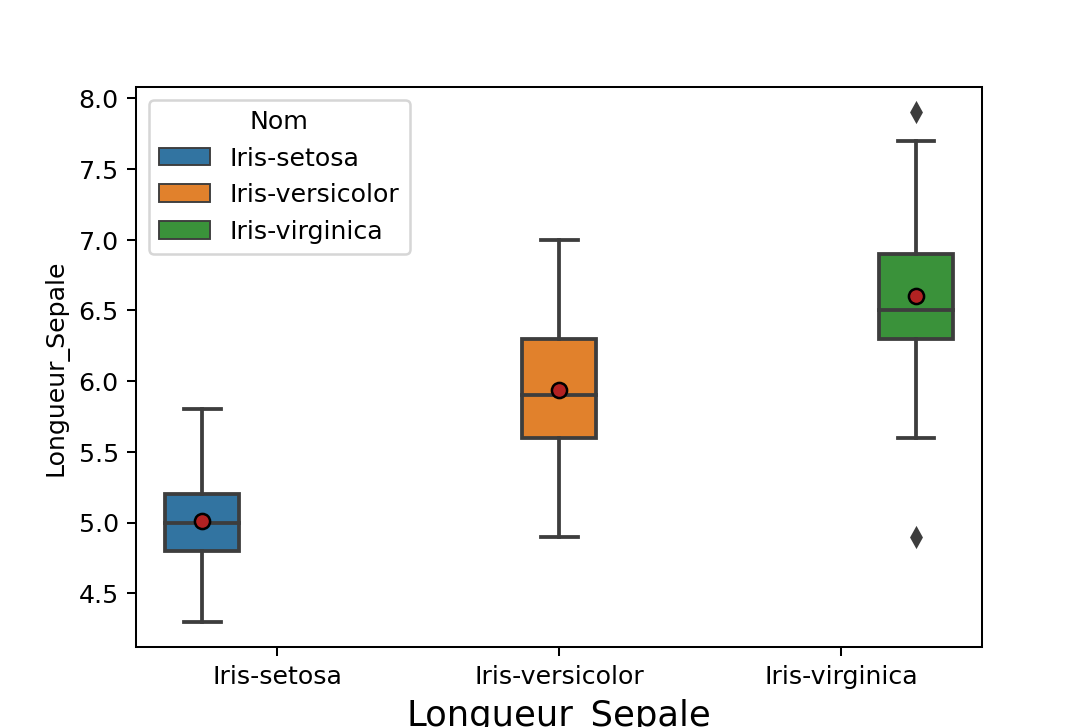

<IPython.core.display.Javascript object>


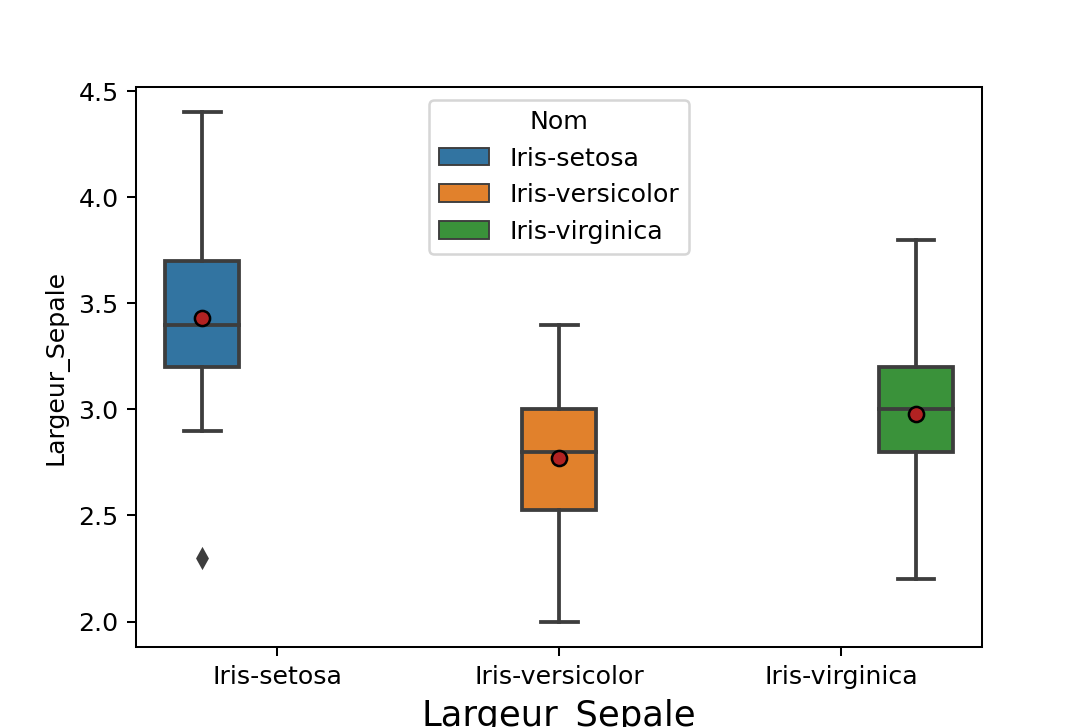

<IPython.core.display.Javascript object>


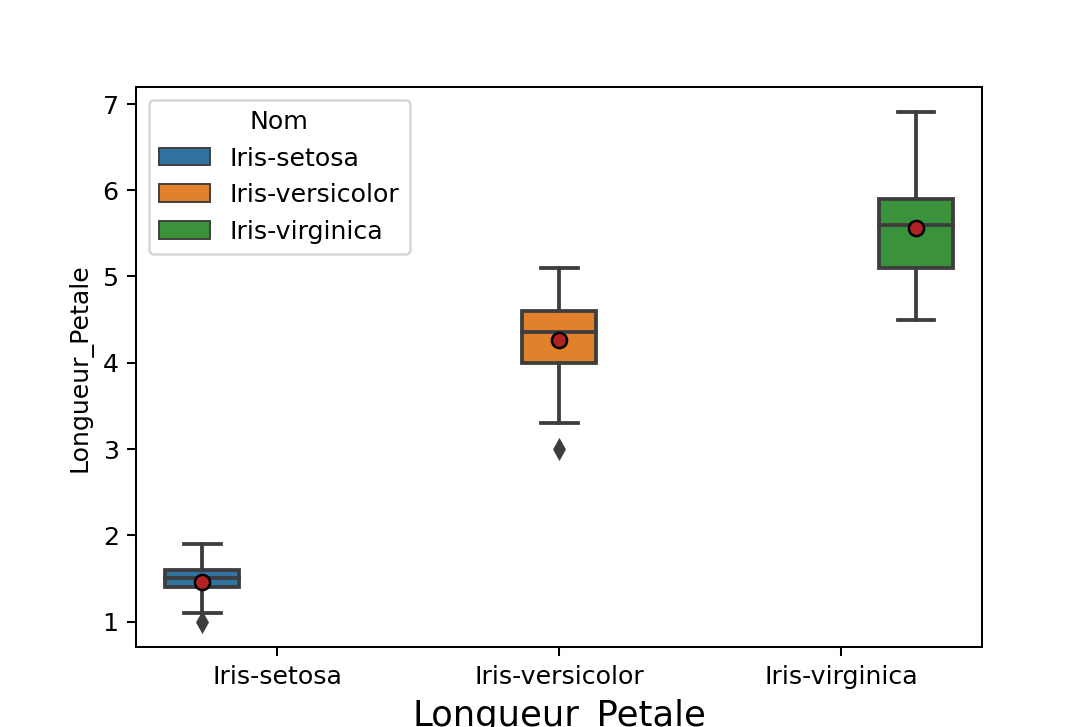

<IPython.core.display.Javascript object>


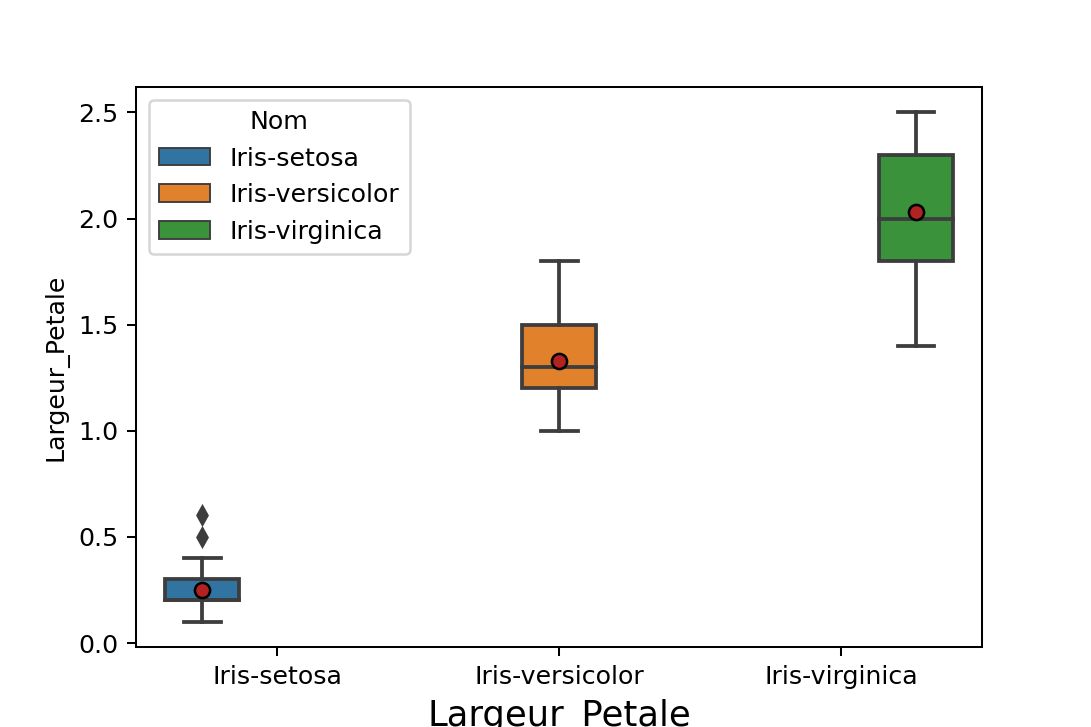

In [186]:
###Représentations graphiques : boxplots
for var in var_X:
    plt.figure(figsize=(6,4))
    meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'}
    sns.boxplot(x='Nom',y=var,data=data,showmeans=True, meanprops=meanprops,hue='Nom')
    plt.xlabel(var, fontsize=14)
    plt.show()


### Analyse descriptive

In [187]:
setosa.describe()

,Longueur_Sepale,Largeur_Sepale,Longueur_Petale,Largeur_Petale
count,48.000000,48.000000,48.000000,48.000000
mean,5.010417,3.431250,1.462500,0.250000
std,0.359219,0.383243,0.177002,0.105185
min,4.300000,2.300000,1.000000,0.100000
25%,4.800000,3.200000,1.400000,0.200000
50%,5.000000,3.400000,1.500000,0.200000
75%,5.200000,3.700000,1.600000,0.300000
max,5.800000,4.400000,1.900000,0.600000


In [188]:
versicolor.describe()

,Longueur_Sepale,Largeur_Sepale,Longueur_Petale,Largeur_Petale
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [189]:
virginica.describe()

,Longueur_Sepale,Largeur_Sepale,Longueur_Petale,Largeur_Petale
count,49.000000,49.000000,49.000000,49.000000
mean,6.604082,2.979592,5.561224,2.028571
std,0.632113,0.323380,0.553706,0.276887
min,4.900000,2.200000,4.500000,1.400000
25%,6.300000,2.800000,5.100000,1.800000
50%,6.500000,3.000000,5.600000,2.000000
75%,6.900000,3.200000,5.900000,2.300000
max,7.900000,3.800000,6.900000,2.500000


### Test de Kruskal-Wallis

In [190]:
help(stats.kruskal)

Help on function kruskal in module scipy.stats._stats_py:

kruskal(*samples, nan_policy='propagate', axis=0, keepdims=False)
    Compute the Kruskal-Wallis H-test for independent samples.
    
    The Kruskal-Wallis H-test tests the null hypothesis that the population
    median of all of the groups are equal.  It is a non-parametric version of
    ANOVA.  The test works on 2 or more independent samples, which may have
    different sizes.  Note that rejecting the null hypothesis does not
    indicate which of the groups differs.  Post hoc comparisons between
    groups are required to determine which groups are different.
    
    Parameters
    ----------
    sample1, sample2, ... : array_like
        Two or more arrays with the sample measurements can be given as
        arguments. Samples must be one-dimensional.
    nan_policy : {'propagate', 'omit', 'raise'}
        Defines how to handle input NaNs.
        
        - ``propagate``: if a NaN is present in the axis slice (e.g. row

In [191]:
##Initialisation des variables
stat_kw=[]
p_val=[]

for var in var_X:
    kstat, pv = stats.kruskal(setosa[var], virginica[var],versicolor[var])

    ###
    stat_kw.append(kstat)
    p_val.append(pv)

res_kw=pd.DataFrame({
    'variable' : var_X,
    'statistique' : stat_kw,
    'p_valeur':p_val
})

res_kw

,variable,statistique,p_valeur
0,Longueur_Sepale,94.566718,2.918087e-21
1,Largeur_Sepale,61.921377,3.580501e-14
2,Longueur_Petale,127.653832,1.906876e-28
3,Largeur_Petale,128.375860,1.329034e-28


### Test d'ANOVA

$\textbf{Analyse de variance (ANOVA) :}$   permet de tester l’effet de la variable discrète reponse sur les différentes variables explicatives.


$\textbf{ANOVA}$ est utilisée si

. la variable quantitative est normalement distribuée dans chaque groupe

. les variances des groupes sont égales

. les observations sont indépendantes


$\textbf{H_0}$ : Les moyennes des classes sont égales (pas de variation de moyenne dans les $p$ classes)
        $$\mu_1=\mu_2=\cdots=\mu_p$$
        
$\textbf{H_1}$ : Au moins la moyenne d'une classe est différente de ce celle des autres.

Si la p-valeur est inférieure au seuil de significativité alors on rejette l'hypothèse $\textbf{H_0}$.

In [192]:
help(f_oneway)

Help on function f_oneway in module scipy.stats._stats_py:

f_oneway(*samples, axis=0)
    Perform one-way ANOVA.
    
    The one-way ANOVA tests the null hypothesis that two or more groups have
    the same population mean.  The test is applied to samples from two or
    more groups, possibly with differing sizes.
    
    Parameters
    ----------
    sample1, sample2, ... : array_like
        The sample measurements for each group.  There must be at least
        two arguments.  If the arrays are multidimensional, then all the
        dimensions of the array must be the same except for `axis`.
    axis : int, optional
        Axis of the input arrays along which the test is applied.
        Default is 0.
    
    Returns
    -------
    statistic : float
        The computed F statistic of the test.
    pvalue : float
        The associated p-value from the F distribution.
    
    Warns
    -----
    `~scipy.stats.ConstantInputWarning`
        Raised if all values within each of t

In [193]:
####
stat_val, pval=f_oneway(setosa[var_X],virginica[var_X],versicolor[var_X])

res_anova=pd.DataFrame({'variable':var_X,
                       'stat':stat_val,
                       'p_value' :pval})
res_anova

,variable,stat,p_value
0,Longueur_Sepale,116.672939,7.530912e-31
1,Largeur_Sepale,47.869839,1.150338e-16
2,Longueur_Petale,1132.387047,8.180546e-89
3,Largeur_Petale,915.183585,1.352973e-82


# Normalité des données

### Représentation graphique

Setosa

<IPython.core.display.Javascript object>


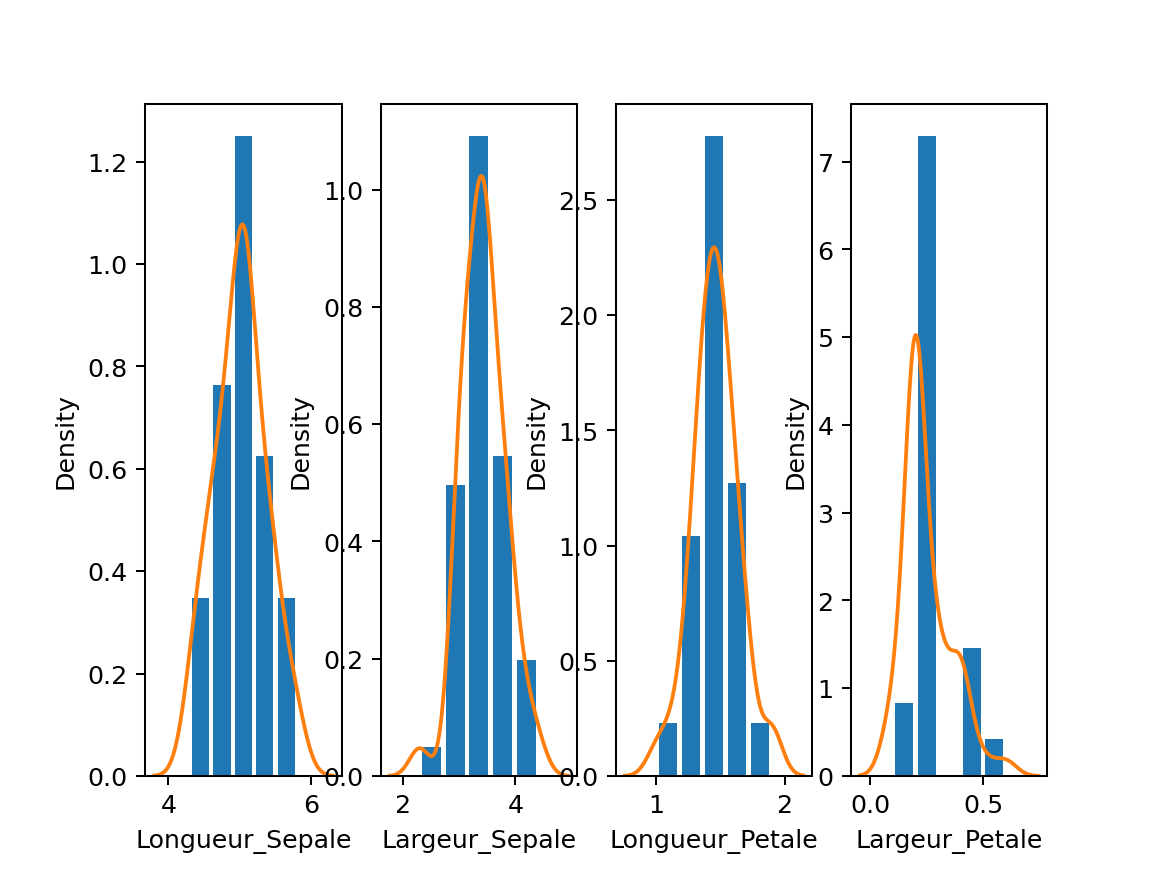

<Axes: xlabel='Largeur_Petale', ylabel='Density'>

In [194]:
plt.figure()
plt.subplot(141)
plt.hist(setosa[var_X[0]],  bins = 5,rwidth = 0.8,density = True)
sns.kdeplot(setosa[var_X[0]])
plt.subplot(142)
plt.hist(setosa[var_X[1]],  bins = 5,rwidth = 0.8,density = True)
sns.kdeplot(setosa[var_X[1]])
plt.subplot(143)
plt.hist(setosa[var_X[2]],  bins = 5,rwidth = 0.8,density = True)
sns.kdeplot(setosa[var_X[2]])
plt.subplot(144)
plt.hist(setosa[var_X[3]],  bins = 5,rwidth = 0.8,density = True)
sns.kdeplot(setosa[var_X[3]])


versicolor

<IPython.core.display.Javascript object>


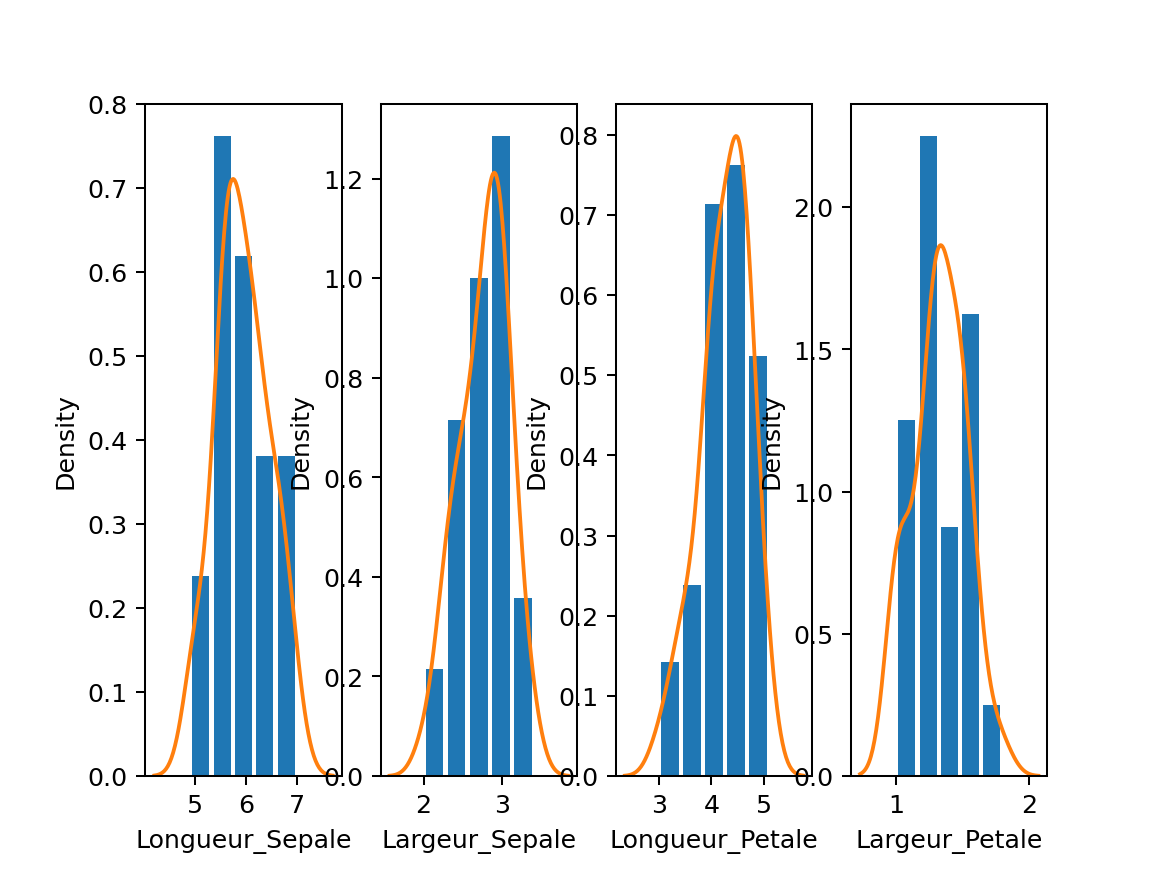

<Axes: xlabel='Largeur_Petale', ylabel='Density'>

In [195]:
plt.figure()
plt.subplot(141)
plt.hist(versicolor[var_X[0]],  bins = 5,rwidth = 0.8,density = True)
sns.kdeplot(versicolor[var_X[0]])
plt.subplot(142)
plt.hist(versicolor[var_X[1]],  bins = 5,rwidth = 0.8,density = True)
sns.kdeplot(versicolor[var_X[1]])
plt.subplot(143)
plt.hist(versicolor[var_X[2]],  bins = 5,rwidth = 0.8,density = True)
sns.kdeplot(versicolor[var_X[2]])
plt.subplot(144)
plt.hist(versicolor[var_X[3]],  bins = 5,rwidth = 0.8,density = True)
sns.kdeplot(versicolor[var_X[3]])


virginica

<IPython.core.display.Javascript object>


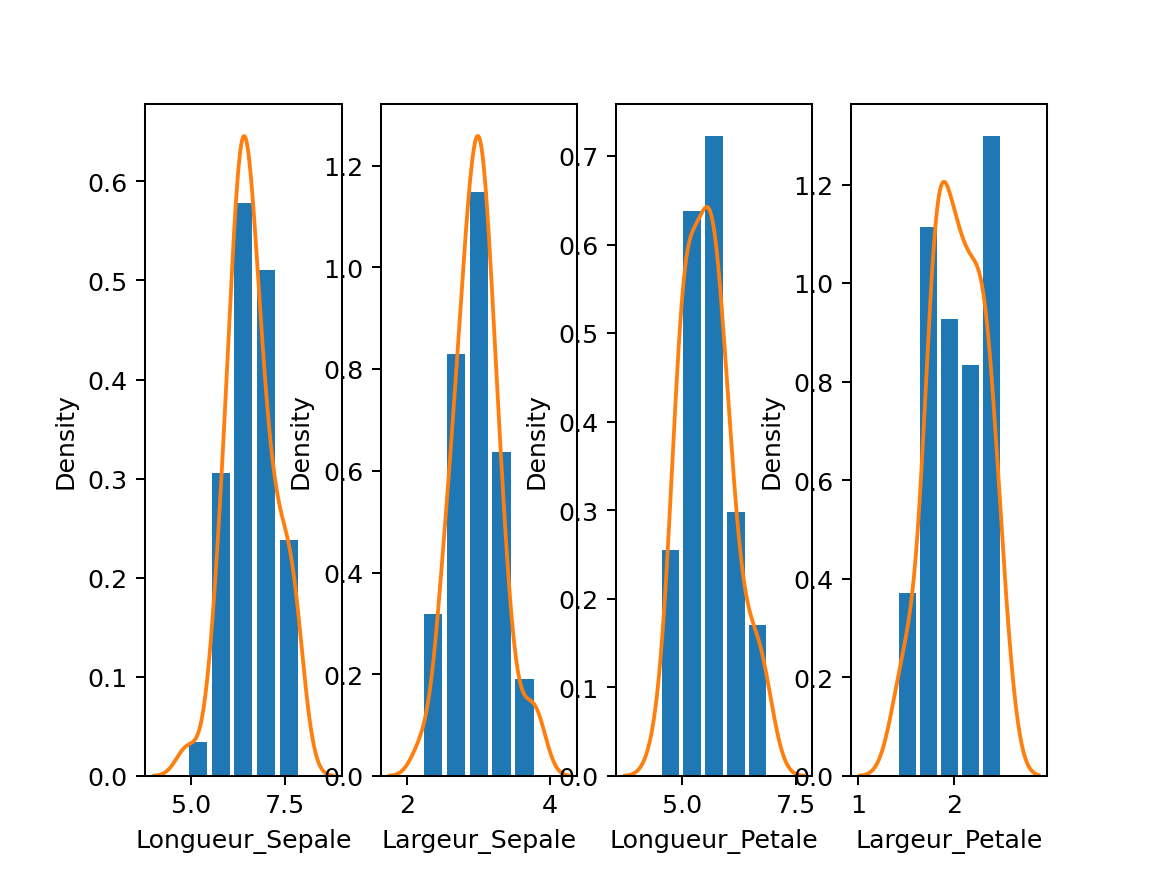

<Axes: xlabel='Largeur_Petale', ylabel='Density'>

In [196]:
plt.figure()
plt.subplot(141)
plt.hist(virginica[var_X[0]],  bins = 5,rwidth = 0.8,density = True)
sns.kdeplot(virginica[var_X[0]])
plt.subplot(142)
plt.hist(virginica[var_X[1]],  bins = 5,rwidth = 0.8,density = True)
sns.kdeplot(virginica[var_X[1]])
plt.subplot(143)
plt.hist(virginica[var_X[2]],  bins = 5,rwidth = 0.8,density = True)
sns.kdeplot(virginica[var_X[2]])
plt.subplot(144)
plt.hist(virginica[var_X[3]],  bins = 5,rwidth = 0.8,density = True)
sns.kdeplot(virginica[var_X[3]])

$\textbf{Skewness (Asymétrie)}$ : mésure l'asymétrie des données. Une loi symétrique a un coefficient de skewness nul. Mais un coefficient de skewness nul ne correspond pas nécessairement à une loi symétrique.

$\textbf{Kurtosis (Aplatissement)}$ : mésure l'aplatissement des données. A partir de la définition de Fisher, la différence entre le résultat et 3 donne une valeur de kurtosis nulle pour la loi normale

In [197]:
X=np.random.normal(loc=0,scale=1,size=50000)
print(skew(X),kurtosis(X))

-0.01900214207329423 -0.016568284578577508


In [198]:
###Calcul de skewness et kurtosis
sym_setosa=[]
applat_setosa=[]

###
sym_versicolor=[]
applat_versicolor=[]

###
sym_virginica=[]
applat_virginica=[]

###
for var in var_X:
    ###
    sym_setosa.append(skew(setosa[var]))
    applat_setosa.append(kurtosis(setosa[var]))
    ###
    sym_versicolor.append(skew(versicolor[var]))
    applat_versicolor.append(kurtosis(versicolor[var]))
    ###
    sym_virginica.append(skew(virginica[var]))
    applat_virginica.append(kurtosis(virginica[var]))

coef_setosa=pd.DataFrame({
    'Variable': var_X,
    'symétrie': sym_setosa,
    'applatissement' : applat_setosa
})

coef_versicolor=pd.DataFrame({
    'Variable': var_X,
    'symétrie': sym_versicolor,
    'applatissement' : applat_versicolor
})

coef_virginica=pd.DataFrame({
    'Variable': var_X,
    'symétrie': sym_virginica,
    'applatissement' : applat_virginica
})

print('SETOSA','\n',coef_setosa)
print('VERSICOLOR','\n',coef_versicolor)
print('VIRGINICA','\n',coef_virginica)

SETOSA 
           Variable  symétrie  applatissement
0  Longueur_Sepale  0.078589       -0.437388
1   Largeur_Sepale  0.026116        0.725381
2  Longueur_Petale  0.093784        0.677255
3   Largeur_Petale  1.219437        1.384615
VERSICOLOR 
           Variable  symétrie  applatissement
0  Longueur_Sepale  0.102190       -0.598827
1   Largeur_Sepale -0.351867       -0.448272
2  Longueur_Petale -0.588159       -0.074402
3   Largeur_Petale -0.030236       -0.487833
VIRGINICA 
           Variable  symétrie  applatissement
0  Longueur_Sepale  0.082602       -0.018327
1   Largeur_Sepale  0.319770        0.520322
2  Longueur_Petale  0.499664       -0.279413
3   Largeur_Petale -0.151286       -0.683660


### Test de Shapiro

In [199]:
help(stats.shapiro)

Help on function shapiro in module scipy.stats._morestats:

shapiro(x)
    Perform the Shapiro-Wilk test for normality.
    
    The Shapiro-Wilk test tests the null hypothesis that the
    data was drawn from a normal distribution.
    
    Parameters
    ----------
    x : array_like
        Array of sample data.
    
    Returns
    -------
    statistic : float
        The test statistic.
    p-value : float
        The p-value for the hypothesis test.
    
    See Also
    --------
    anderson : The Anderson-Darling test for normality
    kstest : The Kolmogorov-Smirnov test for goodness of fit.
    
    Notes
    -----
    The algorithm used is described in [4]_ but censoring parameters as
    described are not implemented. For N > 5000 the W test statistic is
    accurate, but the p-value may not be.
    
    References
    ----------
    .. [1] https://www.itl.nist.gov/div898/handbook/prc/section2/prc213.htm
    .. [2] Shapiro, S. S. & Wilk, M.B (1965). An analysis of variance

setosa

In [200]:
####
stat_setosa=[]
pv_setosa=[]

####
stat_versicolor=[]
pv_versicolor=[]

####
stat_virginica=[]
pv_virginica=[]

for var in var_X:
    ST_setosa=stats.shapiro(setosa[var])
    stat_setosa.append(ST_setosa.statistic)
    pv_setosa.append(ST_setosa.pvalue)

shap_setosa=pd.DataFrame({
    'variables': var_X,
    'statistic':stat_setosa,
    'p-value':pv_setosa
})
shap_setosa

,variables,statistic,p-value
0,Longueur_Sepale,0.976370,0.437917
1,Largeur_Sepale,0.971324,0.284995
2,Longueur_Petale,0.958571,0.088382
3,Largeur_Petale,0.795648,0.000001


versicolor

In [201]:
###
stat_versi=[]
pv_versi=[]

for var in var_X:
    N_stat=stats.shapiro(versicolor[var])
    stat_versi.append(N_stat.statistic)
    pv_versi.append(N_stat.pvalue)

versicolor_shapiro=pd.DataFrame({
    'variables': var_X,
    'statistic':stat_versi,
    'p-value':pv_versi
})
versicolor_shapiro

,variables,statistic,p-value
0,Longueur_Sepale,0.977836,0.464738
1,Largeur_Sepale,0.974133,0.337984
2,Longueur_Petale,0.966004,0.158476
3,Largeur_Petale,0.947627,0.027278


virginica

In [202]:
###
stat_virgi=[]
pv_virgi=[]

for var in var_X:
    N_stat=stats.shapiro(virginica[var])
    stat_virgi.append(N_stat.statistic)
    pv_virgi.append(N_stat.pvalue)

virginica_shapiro=pd.DataFrame({
    'variables': var_X,
    'statistic':stat_virgi,
    'p-value':pv_virgi
})
virginica_shapiro

,variables,statistic,p-value
0,Longueur_Sepale,0.970493,0.253321
1,Largeur_Sepale,0.967217,0.187179
2,Longueur_Petale,0.965525,0.159743
3,Largeur_Petale,0.958836,0.084842


# Résumé

1) Les médianes sont différentes  dans les trois classes (test de Kruskal-Wallis) pour toutes les variables explicatives.

2) Les moyennes des trois classes sont différentes (ANOVA) pour les variables.

3) Les données au sein de chaque classe peuvent être $\textbf{supposées}$ normales

# Echantillonnage Train set -test set 

In [1]:
###Divisons la dataset en train et test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[var_X],data[var_y], test_size=0.2, random_state=42)

NameError: name 'data' is not defined

In [204]:
print(X_train.shape,X_test.shape)

(117, 4) (30, 4)


# Bernoulli Naîve Bayes

Ce modèle est Utilisé pour les applications telles que
- la détection du spam
- la classification de texte et l'analyse des sentiments
- la détection de la présence ou non d'un mot dans un document.

In [205]:
help(BernoulliNB)

Help on class BernoulliNB in module sklearn.naive_bayes:

class BernoulliNB(_BaseDiscreteNB)
 |  BernoulliNB(*, alpha=1.0, force_alpha='warn', binarize=0.0, fit_prior=True, class_prior=None)
 |  
 |  Naive Bayes classifier for multivariate Bernoulli models.
 |  
 |  Like MultinomialNB, this classifier is suitable for discrete data. The
 |  difference is that while MultinomialNB works with occurrence counts,
 |  BernoulliNB is designed for binary/boolean features.
 |  
 |  Read more in the :ref:`User Guide <bernoulli_naive_bayes>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float or array-like of shape (n_features,), default=1.0
 |      Additive (Laplace/Lidstone) smoothing parameter
 |      (set alpha=0 and force_alpha=True, for no smoothing).
 |  
 |  force_alpha : bool, default=False
 |      If False and alpha is less than 1e-10, it will set alpha to
 |      1e-10. If True, alpha will remain unchanged. This may cause
 |      numerical errors if alpha is too close to 0.
 |  
 |   

In [206]:
from sklearn.naive_bayes import BernoulliNB

model_Bern = BernoulliNB()
model_Bern.fit(X_train, y_train)
model_Bern.get_params()

{'alpha': 1.0,
 'binarize': 0.0,
 'class_prior': None,
 'fit_prior': True,
 'force_alpha': 'warn'}

### Mesure de performance

Accuracy score est : 0.3333333333333333


<IPython.core.display.Javascript object>


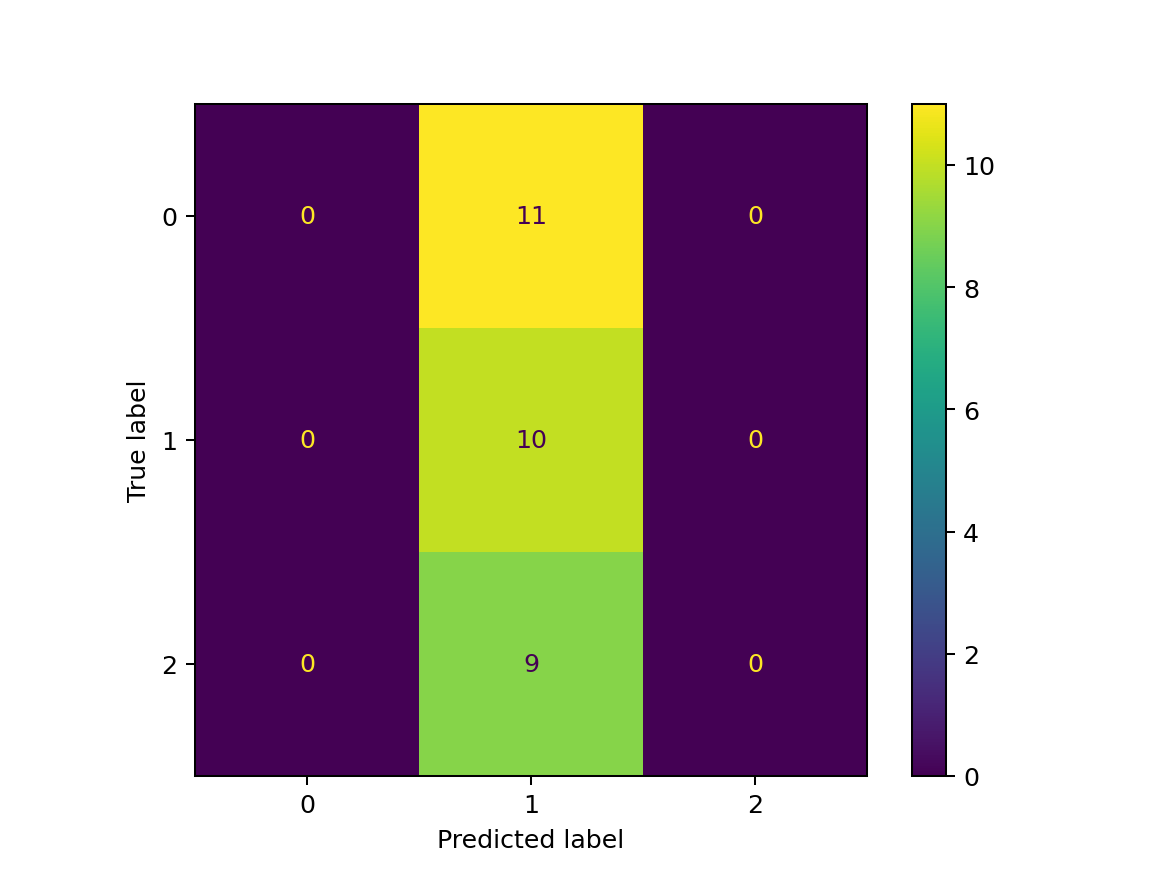

In [207]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, ConfusionMatrixDisplay

pred_Bern = model_Bern.predict(X_test)
prec_Bern= accuracy_score(y_test, pred_Bern)

####
print("Accuracy score est :", prec_Bern)
####
cm=confusion_matrix(y_test, pred_Bern)
cm_display = ConfusionMatrixDisplay(cm).plot()

### Gaussian Naîve Bayes 

In [221]:
from sklearn.naive_bayes import GaussianNB

model_Gauss = GaussianNB()
model_Gauss.fit(X_train, y_train)
model_Gauss.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [222]:
pred_Gauss = model_Gauss.predict(X_test)
prec_Gauss = accuracy_score(y_test, pred_Gauss)
print('Accuracy score est :', prec_Gauss)

Accuracy score est : 0.9666666666666667


<IPython.core.display.Javascript object>


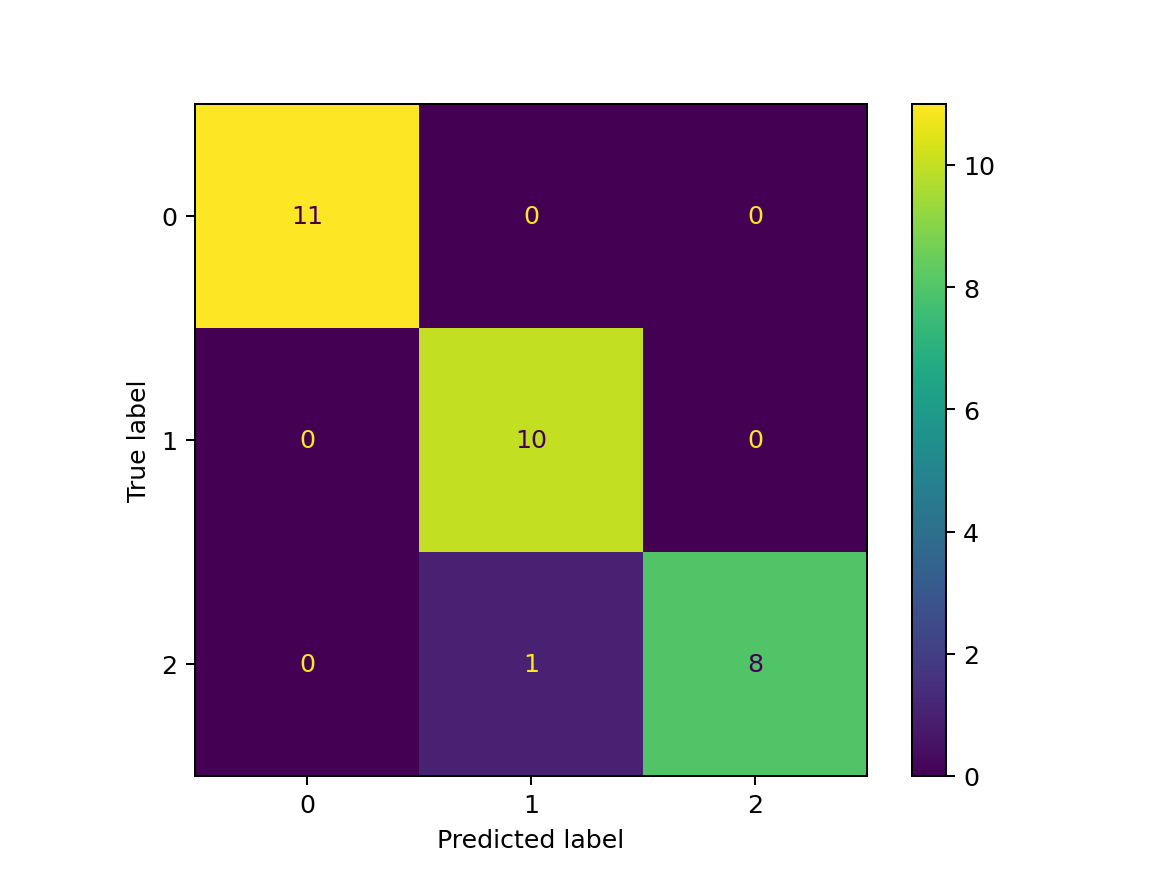

In [210]:
CM=confusion_matrix(y_test, pred_Gauss)
CM_display = ConfusionMatrixDisplay(CM).plot()

# LDA model

In [211]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

help(LinearDiscriminantAnalysis())

Help on LinearDiscriminantAnalysis in module sklearn.discriminant_analysis object:

class LinearDiscriminantAnalysis(sklearn.base.ClassNamePrefixFeaturesOutMixin, sklearn.linear_model._base.LinearClassifierMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=None, store_covariance=False, tol=0.0001, covariance_estimator=None)
 |  
 |  Linear Discriminant Analysis.
 |  
 |  A classifier with a linear decision boundary, generated by fitting class
 |  conditional densities to the data and using Bayes' rule.
 |  
 |  The model fits a Gaussian density to each class, assuming that all classes
 |  share the same covariance matrix.
 |  
 |  The fitted model can also be used to reduce the dimensionality of the input
 |  by projecting it to the most discriminative directions, using the
 |  `transform` method.
 |  
 |  .. versionadded:: 0.17
 |     *LinearDiscriminantAnalysis*.
 |  
 |  Read more i

In [212]:
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train, y_train)
model_lda.get_params()

{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [213]:
pred_lda = model_lda.predict(X_test)
prec_lda= accuracy_score(y_test, pred_lda)
print('Accuracy score est :',prec_lda)

Accuracy score est : 0.9666666666666667


<IPython.core.display.Javascript object>


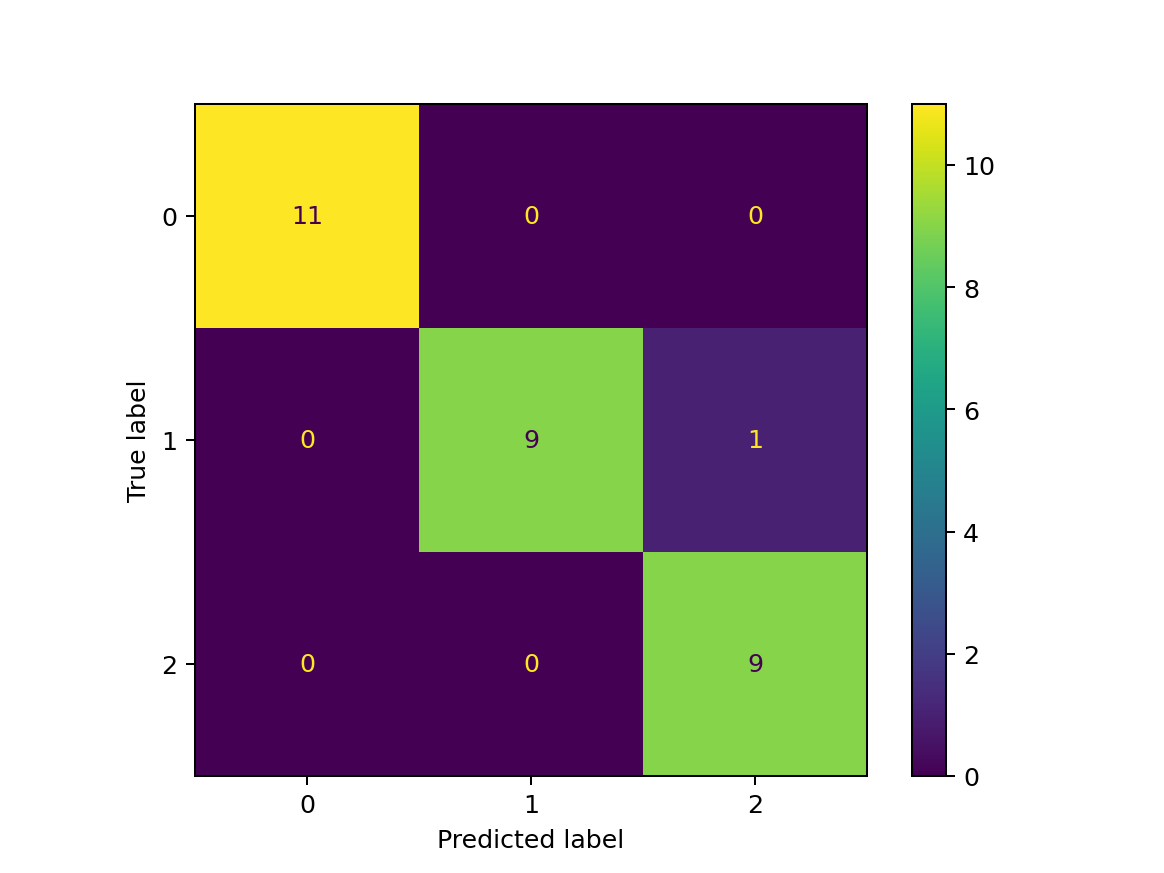

In [214]:
conf_mat=confusion_matrix(y_test, pred_lda)
conf_display = ConfusionMatrixDisplay(conf_mat).plot()

# Validation croisée

In [215]:
from sklearn.model_selection import cross_val_score

In [216]:
help(cross_val_score)

Help on function cross_val_score in module sklearn.model_selection._validation:

cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
    Evaluate a score by cross-validation.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like of shape (n_samples, n_features)
        The data to fit. Can be for example a list, or an array.
    
    y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like of shape (n_samples,), default=None
        Group labels for the samples used while splitting the dataset into
        train/test set. Only used in conjunction with a "Group" :term:`cv

### Gaussian Naîve Bayes

In [233]:
CV1=cross_val_score(model_Gauss,X,y,cv=10)
pd.DataFrame(CV1)

,0
0,0.933333
1,0.933333
2,1.000000
3,0.933333
4,0.933333
5,0.933333
6,0.866667
7,1.000000
8,1.000000
9,1.000000


### LDA model

In [234]:
CV2=cross_val_score(model_lda,X,y,cv=10)
pd.DataFrame(CV2)

,0
0,1.000000
1,1.000000
2,1.000000
3,1.000000
4,0.933333
5,1.000000
6,0.866667
7,1.000000
8,1.000000
9,1.000000
